In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
headers = [ 'x'+('00'+str(i))[-3:] for i in range(785)]
filepath = f'.{os.sep}data{os.sep}mnist_train.csv'
dfdigits = pd.read_csv(filepath, names=headers)

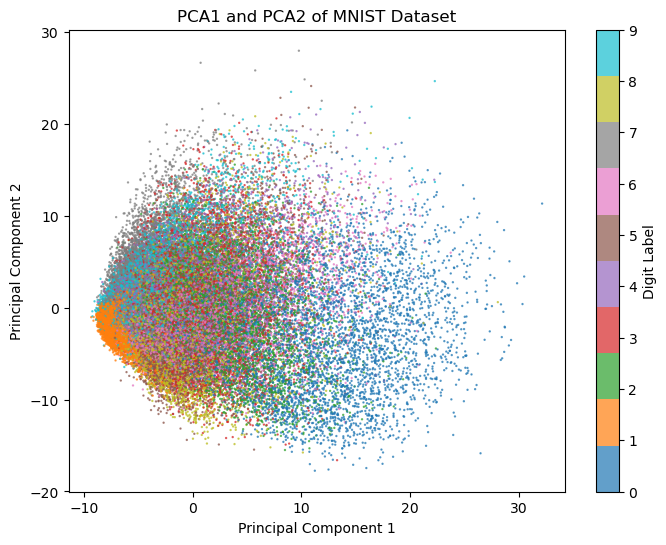

Explained Variance Ratio: [0.05695112 0.04115733]


In [3]:
X = dfdigits.iloc[:, 1:].values # pixel data
y = dfdigits.iloc[:, 0].values # labels
# split into train and test sets (80% training, 20% testing, with stratification)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1)
# standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # applying fit from training set

# PCA analysis
pca = PCA(n_components=2) # reducing data to 2 dimensions
X_train_pca = pca.fit_transform(X_train_scaled)

# plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', s=0.5, alpha=0.7)
plt.colorbar(label='Digit Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA1 and PCA2 of MNIST Dataset')
plt.show()

# variance explained by two principal components
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

PCA reduces the dimentionality of the MNIST dataset while maintaining the information of the original set.

PCA is a linear dimentionality reduction technique which is unable to explain the high complexity/non-linearity of the dataset with just the two linear PCA components.

This can be seen in the explained variance ratio which states PCA1and2 account for about 10% of the dataset variance.

Since PCA doesn't capture the total variance, projecting the 784-dimensional MNIST data onto PCA1and2 creates overlapping clusters.

More components could be used to better represent the data.

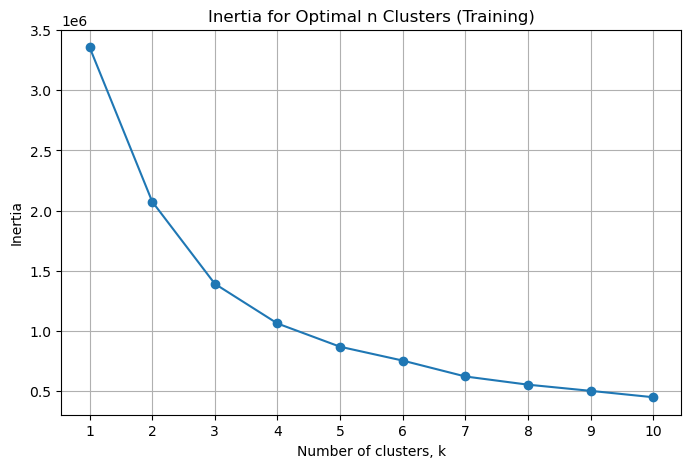

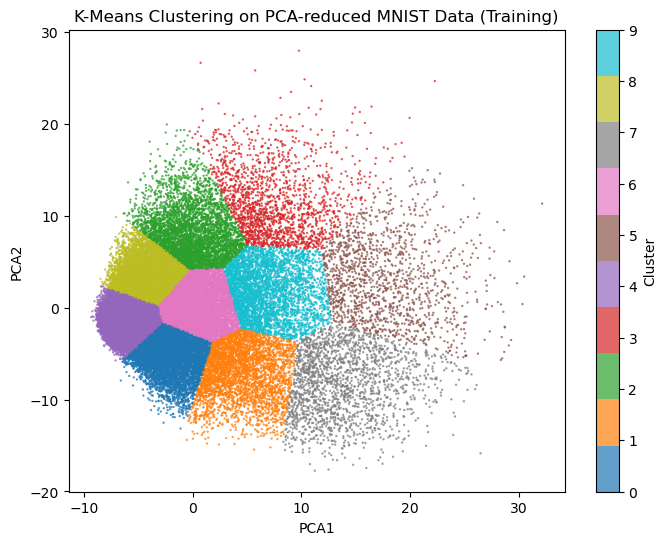

In [4]:
#%% Kmeans
# calculate inertia for optimal number of clusters (training)
inertias = []
k_values = range(1, 11) # testing k-values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_pca)
    inertias.append(kmeans.inertia_)

# plot inertia
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Inertia for Optimal n Clusters (Training)')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# K-Means for k=10 (training)
kmeans = KMeans(n_clusters=10, random_state=0)
labels_train = kmeans.fit_predict(X_train_pca)

# plot PCA with KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels_train, cmap='tab10', s=0.5, alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering on PCA-reduced MNIST Data (Training)')
plt.show()

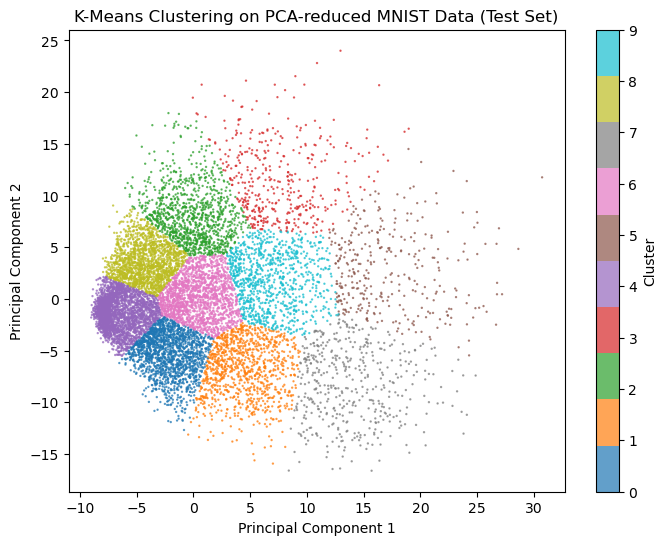

In [5]:
# apply PCA to test set
X_test_pca = pca.transform(X_test_scaled)
# Predict clusters for the test set
labels_test = kmeans.predict(X_test_pca)
# Plot the test set clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=labels_test, cmap='tab10', s=0.5, alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-reduced MNIST Data (Test Set)')
plt.show()

K-means is used create tightly packed clusters by minimizing the inertia, or the sum of squared distatances between adjacent cluster centers.

Without knowing n=10, you can plot the k-means using increasing values of k and observing the inertia for different numbers of clusters.

If I had no prior knowledge about the data set, using the inertia perspective, I would use n=5 because this is where the decrease in inertia starts to level out.